**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [5]:
vec = c("CRISPRi-HCRFF", "CRISPRi-Growth", "ENCODE-rE2G Benchmark")
names(vec) = vec
VEC_TXT_ASSAY_OUT = vec

vec = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "ATAC")
names(vec) = vec
VEC_TXT_ASSAY_INP = vec

**Check input files**

In [6]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "region.coverage.score.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.score.concat.tsv 


## Import data

In [7]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.score.concat.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 586004      8

$fcc_astarr_macs_input_union
[1] 889739      8



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-3.5573621,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.0361388,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-2.1376311,Scale(Log2FC),ASTARR_KS91,ASTARR


**Check: Score distribution**

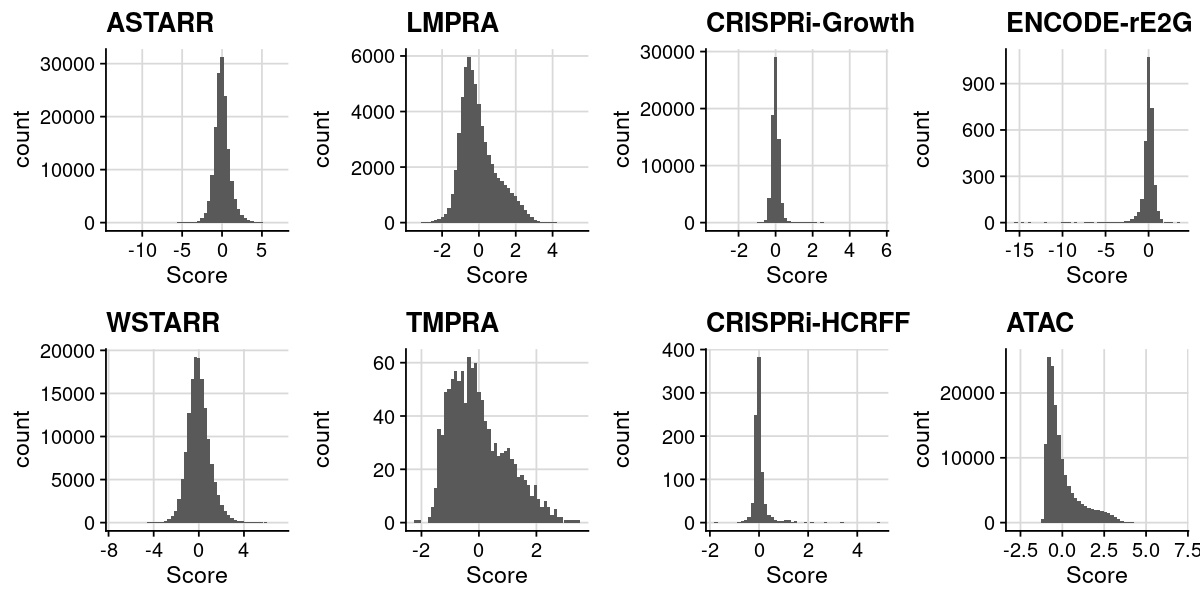

In [8]:
idx = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_score_import
dat = lst[[idx]]

lst = split(dat, dat$Assay_Label)
lst = lapply(lst, function(dat){
    vec = dat$Assay_Label
    txt = paste(unique(vec), collapse = ";")
    gpt = ggplot(dat, aes(x = Score)) + 
        geom_histogram(bins = 50) +
        theme_cowplot() +
        background_grid() +
        labs(title=txt)
    return(gpt)
})


idx = c(
    "ASTARR", "LMPRA", "CRISPRi-Growth", "ENCODE-rE2G Benchmark",
    "WSTARR", "TMPRA", "CRISPRi-HCRFF",  "ATAC"
)
lst = lst[idx]

options(repr.plot.height=5, repr.plot.width=10)
plot_grid(plotlist = lst, nrow=2, align = "v")

**Check: Assay count**

In [9]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::group_by(Assay_Group, Assay_Label) %>%
        dplyr::summarise(Freq = n(), .groups = "drop")
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay_Group,Assay_Label,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
ASTARR_KS91,ASTARR,150040,246850
ASTARR_KS91,ATAC,150041,246852
CRISPRi-Growth,CRISPRi-Growth,72743,80288
CRISPRi-HCRFF,CRISPRi-HCRFF,925,1330
ENCODE-rE2G,ENCODE-rE2G Benchmark,3035,3169
LMPRA,LMPRA,61478,68497
TMPRA,TMPRA,1148,1722
WSTARR,WSTARR,146594,241031


**Check: Missing values**

In [10]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    tmp = any(is.na(dat))
    return(tmp)
})

print(lst)

$fcc_astarr_macs_input_overlap
[1] FALSE

$fcc_astarr_macs_input_union
[1] FALSE



## Arrange table

In [11]:
### select and split regions by assay
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import

dat = lst[[idx]]
lst = split(dat, dat$Assay_Label)

### assign and show
lst_dat_region_score = lst
print(names(lst))

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-rE2G Benchmark" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               


In [12]:
lst = lst_dat_region_score
dat = lst[[1]]
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Group,Assay_Label
chr1,10015,10442,chr1:10015-10442,-3.7814427,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,14253,14645,chr1:14253-14645,0.5653917,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,16015,16477,chr1:16015-16477,-2.0997884,Scale(Log2FC),ASTARR_KS91,ASTARR


## Prepare CRISPR groups with different threshold

**Setup different hit rate**

In [13]:
vec = c(
    seq(0.01, 0.1, 0.01), 
    seq(0.2,  0.5, 0.1)
)
names(vec) = str_pad(
    string = as.character(vec), 
    width  = 4, 
    side   = "right", 
    pad    = 0
)
#names(vec) = paste0("Top_", str_pad(string = round(vec, 2) * 100, width = 2, pad = 0), "%")

vec_num_hit_rate = vec
print(vec)

0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.20 0.30 0.40 0.50 
0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.20 0.30 0.40 0.50 


**Prepare CRISPR groups based on different hit rate**

In [14]:
### loop through each threshold
lst = lapply(vec_num_hit_rate, function(num_hit_rate){
    ### set hit and non hit for each CRISPR assay
    lst = lapply(VEC_TXT_ASSAY_OUT, function(txt_assay_out){
        ### get the output assay
        lst = lst_dat_region_score
        dat = lst[[txt_assay_out]]
        
        ### get the score of output assay
        vec = dat$Score
        vec = abs(vec)
        vec_num_score_out = vec
    
        ### determine score cutoff
        num_cutoff_out = quantile(vec_num_score_out, probs = 1 - num_hit_rate)
    
        ### setup group by cutoff
        dat$Group_CRISPR = ifelse(vec_num_score_out >= num_cutoff_out, 1, 0)
        dat$Score_CRISPR = dat$Score
        dat = dat %>% 
            dplyr::select(Region, Group_CRISPR, Score_CRISPR) %>% 
            dplyr::distinct()
        return(dat)
    })

    ### concatenate the tables across assays
    dat = bind_rows(lst, .id = "Assay_CRISPR")
    dat_region_group_crispr_split = dat
    
    ### setup the CRISPR (pool) group
    dat = dat_region_group_crispr_split
    dat = dat %>% 
        dplyr::group_by(Region) %>% 
        dplyr::summarise(
            Count_CRISPR =  sum(Group_CRISPR),
            Score_CRISPR = mean(Score_CRISPR),
            .groups = "drop"
        ) %>%
        dplyr::mutate(Group_CRISPR = ifelse(Count_CRISPR > 0, 1, 0)) %>%
        dplyr::mutate(Assay_CRISPR = "CRISPR") %>%
        dplyr::select(Region, Group_CRISPR, Score_CRISPR, Assay_CRISPR)
    dat_region_group_crispr_pool = dat
    
    ### concatenate the tables
    dat = bind_rows(
        dat_region_group_crispr_split,
        dat_region_group_crispr_pool
    ) %>% 
    dplyr::mutate(CutOff_CRISPR = num_hit_rate) 
    return(dat)
})

### assign and show
lst_dat_region_group_crispr = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$`0.01`
[1] 166020      5

$`0.02`
[1] 166020      5

$`0.03`
[1] 166020      5

$`0.04`
[1] 166020      5

$`0.05`
[1] 166020      5

$`0.06`
[1] 166020      5

$`0.07`
[1] 166020      5

$`0.08`
[1] 166020      5

$`0.09`
[1] 166020      5

$`0.10`
[1] 166020      5

$`0.20`
[1] 166020      5

$`0.30`
[1] 166020      5

$`0.40`
[1] 166020      5

$`0.50`
[1] 166020      5



Assay_CRISPR,Region,Group_CRISPR,Score_CRISPR,CutOff_CRISPR
<chr>,<chr>,<dbl>,<dbl>,<dbl>
CRISPRi-HCRFF,chr11:4092104-4092566,0,-0.13403994,0.01
CRISPRi-HCRFF,chr11:4094204-4095676,0,-0.04821938,0.01
CRISPRi-HCRFF,chr11:4144511-4147030,0,-0.07024901,0.01


## Prepare STARRMPRA scores

In [15]:
lst = lapply(VEC_TXT_ASSAY_INP, function(txt_assay_inp){
    ### get the input assay
    lst = lst_dat_region_score
    dat = lst[[txt_assay_inp]]
    
    ### get the score of input assay
    dat = dat %>% 
        dplyr::mutate(Score_STARRMPRA = Score) %>%
        dplyr::select(Region, Score_STARRMPRA) %>%
        dplyr::distinct()
})
dat = bind_rows(lst, .id = "Assay_STARRMPRA")

### assign and show
dat_region_score_starrmpra = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 804952      3


Assay_STARRMPRA,Region,Score_STARRMPRA
ASTARR,chr1:10015-10442,-3.7814427
ASTARR,chr1:14253-14645,0.5653917
ASTARR,chr1:16015-16477,-2.0997884
ASTARR,chr1:17237-17772,-2.2945413
ASTARR,chr1:28903-29613,-3.2907725
ASTARR,chr1:30803-31072,-0.0785169


## Join tables between CRISPR groups and STARRMPRA scores

In [16]:
lst = lst_dat_region_group_crispr
lst = lapply(lst, function(dat){
    ### join tables: CRISPR groups and STARRMPRA scores
    dat = dat %>% 
        dplyr::inner_join(
            dat_region_score_starrmpra, 
            by = "Region",
            relationship = "many-to-many"
        )

    ### arrange table
    dat = dat %>%
        dplyr::select(
            CutOff_CRISPR, Region,
            Assay_CRISPR, Group_CRISPR, Score_CRISPR,
            Assay_STARRMPRA, Score_STARRMPRA
        ) %>%
        dplyr::arrange(CutOff_CRISPR, Region, Assay_CRISPR, Assay_STARRMPRA) %>%
        dplyr::distinct()
    return(dat)
})

lst_dat_region_group_merge = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$`0.01`
[1] 610756      7

$`0.02`
[1] 610756      7

$`0.03`
[1] 610756      7

$`0.04`
[1] 610756      7

$`0.05`
[1] 610756      7

$`0.06`
[1] 610756      7

$`0.07`
[1] 610756      7

$`0.08`
[1] 610756      7

$`0.09`
[1] 610756      7

$`0.10`
[1] 610756      7

$`0.20`
[1] 610756      7

$`0.30`
[1] 610756      7

$`0.40`
[1] 610756      7

$`0.50`
[1] 610756      7



CutOff_CRISPR,Region,Assay_CRISPR,Group_CRISPR,Score_CRISPR,Assay_STARRMPRA,Score_STARRMPRA
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
0.01,chr10:100009096-100010466,CRISPR,0,-0.0378617,ASTARR,-1.2216566
0.01,chr10:100009096-100010466,CRISPR,0,-0.0378617,ATAC,2.3214952
0.01,chr10:100009096-100010466,CRISPR,0,-0.0378617,WSTARR,0.5896695


**Check: Count of regions across groups under different hit rate**

In [17]:
lst = lst_dat_region_group_crispr
lst = lapply(lst, function(dat){
    res = table(dat$Assay_CRISPR, dat$Group_CRISPR, dnn = c("Assay_CRISPR", "Group_CRISPR"))
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "CutOff")
dat = dat %>% tidyr::spread(CutOff, Freq)
fun_display_table(dat)

Assay_CRISPR,Group_CRISPR,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.20,0.30,0.40,0.50
CRISPR,0,80392,79554,78718,77873,77034,76188,75344,74500,73659,72822,64461,56155,47897,39740
CRISPR,1,841,1679,2515,3360,4199,5045,5889,6733,7574,8411,16772,25078,33336,41493
CRISPRi-Growth,0,79485,78682,77879,77076,76273,75470,74667,73865,73062,72259,64230,56201,48173,40144
CRISPRi-Growth,1,803,1606,2409,3212,4015,4818,5621,6423,7226,8029,16058,24087,32115,40144
CRISPRi-HCRFF,0,1316,1303,1290,1276,1263,1250,1236,1223,1210,1197,1064,931,798,665
CRISPRi-HCRFF,1,14,27,40,54,67,80,94,107,120,133,266,399,532,665
ENCODE-rE2G Benchmark,0,3137,3105,3073,3042,3010,2978,2947,2915,2883,2852,2535,2218,1901,1584
ENCODE-rE2G Benchmark,1,32,64,96,127,159,191,222,254,286,317,634,951,1268,1585


In [18]:
lst = lst_dat_region_group_merge
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::filter(Assay_CRISPR == "CRISPR") %>%
        dplyr::select(Region, Assay_CRISPR, Assay_STARRMPRA, Group_CRISPR) %>% 
        dplyr::distinct()
    
    res = table(
        dat$Assay_CRISPR, 
        dat$Assay_STARRMPRA, 
        dat$Group_CRISPR, 
        dnn = c("Assay_CRISPR", "Assay_STARRMPRA", "Group_CRISPR"))
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "CutOff")
dat = dat %>% tidyr::spread(CutOff, Freq)
fun_display_table(dat)

Assay_CRISPR,Assay_STARRMPRA,Group_CRISPR,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.20,0.30,0.40,0.50
CRISPR,ASTARR,0,80392,79554,78718,77873,77034,76188,75344,74500,73659,72822,64461,56155,47897,39740
CRISPR,ASTARR,1,841,1679,2515,3360,4199,5045,5889,6733,7574,8411,16772,25078,33336,41493
CRISPR,ATAC,0,80392,79554,78718,77873,77034,76188,75344,74500,73659,72822,64461,56155,47897,39740
CRISPR,ATAC,1,841,1679,2515,3360,4199,5045,5889,6733,7574,8411,16772,25078,33336,41493
CRISPR,LMPRA,0,53682,53167,52642,52086,51533,50973,50419,49869,49307,48752,43076,37507,32024,26536
CRISPR,LMPRA,1,613,1128,1653,2209,2762,3322,3876,4426,4988,5543,11219,16788,22271,27759
CRISPR,TMPRA,0,1032,1017,1009,996,983,967,948,933,921,903,765,644,519,411
CRISPR,TMPRA,1,21,36,44,57,70,86,105,120,132,150,288,409,534,642
CRISPR,WSTARR,0,79621,78796,77972,77139,76312,75473,74641,73809,72979,72147,63889,55656,47471,39381
CRISPR,WSTARR,1,833,1658,2482,3315,4142,4981,5813,6645,7475,8307,16565,24798,32983,41073


## Explore results

In [19]:
### set file directory
txt_foldr = "fcc_astarr_macs_input_union"
txt_fdiry = file.path(FD_RES, "analysis_fcc_correlation", txt_foldr)
txt_fname = "data.region.merge.group_crispr.score_starrmpra.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)

### save R list of tables
obj = lst_dat_region_group_merge
saveRDS(obj, txt_fpath)